In [ ]:
!pip install dgl
!pip install torch
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/PMI_PMBOK.csv')
df = df.astype(str)
df

Concept  \
0                 plan risk management   
1                       identify risks   
2             implement risk responses   
3                        monitor risks   
4         plan risk management inputs    
..                                 ...   
158          Probability Impact Matrix   
159             Monte Carlo Simulation   
160               Contingency Planning   
161     Contingency Reserve Estimation   
162  Critical Chain Project Management   

                                      Clean_Definition       Process_name  \
0     process defining conduct risk management acti...      register risk   
1     process identifying individual project risks ...      register risk   
2     process implementing agreedupon risk response...      register risk   
3     process monitoring implementation agreedupon ...      register risk   
4                                                  nan      register risk   
..                                                 ...                ...   
158  " Well;well;they can spend their whole days in...   project projects   
159                                                nan        risks roles   
160                                                nan      register risk   
161                                                nan   project projects   
162   How does it affect your business? What can I ...  represent outcome   

    Type_relation  Concept_of_type_relation  \
0        has part              risk process   
1      studied by           risk management   
2      studied by           risk management   
3        facet of           risk management   
4        has part              risk process   
..            ...                       ...   
158       part of  probability distribution   
159   subclass of                simulation   
160   subclass of                      risk   
161   subclass of                      risk   
162      has part               stakeholder   

                                              Keywords  \
0    plan risk management ; risk management activit...   
1    identify risks ; overall project risk ; data f...   
2    risk Responses ; agreed-upon risk response pla...   
3    monitor risks ; risk response plans ; project ...   
4                                                  nan   
..                                                 ...   
158  organizations typically assess;probability-imp...   
159  monte carlo simulation;computer-intensive simu...   
160  risk owner may;owner may choose;approval must ...   
161  conditional response plans;schedule and/or bud...   
162       simple critical chain;critical chain network   

                                              Synonyms  \
0    plans risks managing;plans danger managing;pla...   
1    identifying risk;identifying dangers;determine...   
2    unheard-of risks responses plan;unheard-of ris...   
3    monitors risk;monitors dangers;monitoring risk...   
4    design hazard management input;design hazard m...   
..                                                 ...   
158  organisations usually evaluate;organisations u...   
159  carlo monte simulations;carlo monte simulated;...   
160  risks proprietor might;owners could choice;pro...   
161                                 avidly accept risk   
162                                                nan   

                                   Figures  
0                  Figure 11-2;Figure 11-3  
1                  Figure 11-6;Figure 11-7  
2                 Figure 11-1;Figure 11-19  
3    Figure 11-2;Figure 11-20;Figure 11-21  
4                                      nan  
..                                     ...  
158                 Figure D11;Figure D12.  
159                            Figure D15.  
160                                    nan  
161                                    nan  
162                            Figure D19.  

[163 rows x 8 columns]

In [ ]:
for

In [ ]:
import pandas as pd

In [ ]:
df_triples=pd.read_csv('/content/triples_PMI_PMBOK.csv')
df_trplpes = df_triples.astype(str)
df_triples

Haid          Relation  \
0                  plan risk management          has part   
1                        identify risks        studied by   
2              implement risk responses        studied by   
3                         monitor risks          facet of   
4          plan risk management inputs           has part   
...                                 ...               ...   
1136  Critical Chain Project Management  Clean_Definition   
1137  Critical Chain Project Management      Process_name   
1138  Critical Chain Project Management          Keywords   
1139  Critical Chain Project Management          Synonyms   
1140  Critical Chain Project Management           Figures   

                                                   Tail  
0                                          risk process  
1                                       risk management  
2                                       risk management  
3                                       risk management  
4                                          risk process  
...                                                 ...  
1136   How does it affect your business? What can I ...  
1137                                  represent outcome  
1138       simple critical chain;critical chain network  
1139                                                NaN  
1140                                        Figure D19.  

[1141 rows x 3 columns]

In [ ]:
df_triples.fillna('nan', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

triples = []

for _, row in df_triples.iterrows():
    head = row['Haid']
    relation = row['Relation']
    tail = row['Tail']
    triples.append((head, relation, tail))
# Create a DataFrame from the triples for easy mapping
triples_df = pd.DataFrame(triples, columns=["Haid", "Relation", "Tail"])




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a single LabelEncoder for both entities and relations
entity_encoder = LabelEncoder()
relation_encoder = LabelEncoder()

# Concatenate the unique values from both columns and fit the encoders
all_unique_entities = pd.concat([triples_df["Haid"], triples_df["Tail"]]).unique()
all_unique_relations = triples_df["Relation"].unique()

entity_encoder.fit(all_unique_entities)
relation_encoder.fit(all_unique_relations)

# Transform "Haid," "Tail," and "Realtion" columns to numerical IDs
triples_df["Haid_id"] = entity_encoder.transform(triples_df["Haid"])
triples_df["Tail_id"] = entity_encoder.transform(triples_df["Tail"])
triples_df["Relation_id"] = relation_encoder.transform(triples_df["Relation"])


In [ ]:
triples_df

Haid          Relation  \
0                  plan risk management          has part   
1                        identify risks        studied by   
2              implement risk responses        studied by   
3                         monitor risks          facet of   
4          plan risk management inputs           has part   
...                                 ...               ...   
1136  Critical Chain Project Management  Clean_Definition   
1137  Critical Chain Project Management      Process_name   
1138  Critical Chain Project Management          Keywords   
1139  Critical Chain Project Management          Synonyms   
1140  Critical Chain Project Management           Figures   

                                                   Tail  Haid_id  Tail_id  \
0                                          risk process      331      479   
1                                       risk management      233      469   
2                                       risk management      239      469   
3                                       risk management      293      469   
4                                          risk process      333      479   
...                                                 ...      ...      ...   
1136   How does it affect your business? What can I ...       51        9   
1137                                  represent outcome       51      446   
1138       simple critical chain;critical chain network       51      522   
1139                                                nan       51      300   
1140                                        Figure D19.       51       74   

      Relation_id  
0               9  
1              13  
2              13  
3               6  
4               9  
...           ...  
1136            0  
1137            4  
1138            3  
1139            5  
1140            2  

[1141 rows x 6 columns]

In [ ]:
len(triples_df['Haid'].unique())

163

In [ ]:
triples_df.to_csv('triples_df_ids.csv', index=False)

In [ ]:
import networkx as nx
import pandas as pd

# Create an empty NetworkX graph
G = nx.Graph()

# Assuming you have a DataFrame named `triples_df`
# Read your data into a DataFrame
# Iterate through the DataFrame rows
for index, row in triples_df.iterrows():
    haid_id = row['Haid_id']
    tail_id = row['Tail_id']
    relation_id = row['Relation_id']

    # Add nodes to the graph with their IDs as features
    G.add_node(haid_id, feature=row['Haid'])
    G.add_node(tail_id, feature=row['Tail'])

    # Add an edge with the relation as a feature
    G.add_edge(haid_id, tail_id, relation=row['Relation'])

# Accessing the features of a node
# For example, to get the feature of a node with haid_id:
haid_feature = G.nodes[haid_id]['feature']

# To get the feature of a node with tail_id:
tail_feature = G.nodes[tail_id]['feature']

# To get the relation between haid and tail:
relation_type = G[haid_id][tail_id]['relation']


In [ ]:
list(G.neighbors(76))

[113, 76, 300, 377, 309, 165]

In [ ]:
c=76

In [ ]:
a=list(G.neighbors(c))

In [ ]:
for i in a:
  print(G.get_edge_data(c,i))

{'relation': 'has part'}
{'relation': 'Concept'}
{'relation': 'Figures'}
{'relation': 'Process_name'}
{'relation': 'Keywords'}
{'relation': 'Synonyms'}


In [ ]:
G.nodes[64]['feature']

'Figure 11-2;Figure 11-3'

In [ ]:
G.get_edge_data(331,27)

{'relation': 'Clean_Definition'}

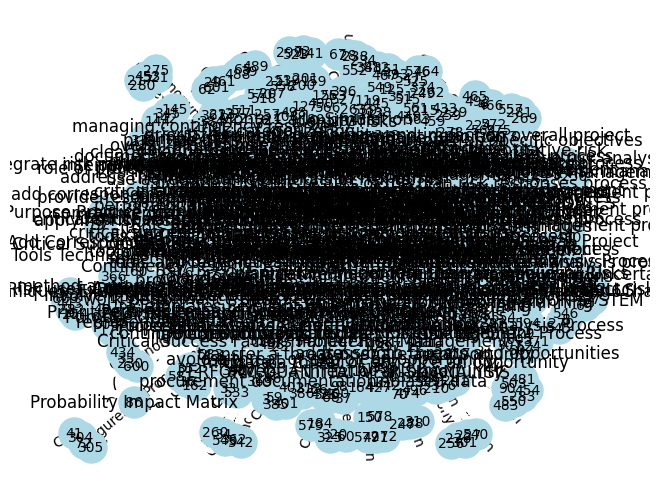

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty NetworkX graph


# Assuming you have added nodes and edges as described in the previous response.

# Display the graph with node and edge attributes
pos = nx.spring_layout(G)  # You can use different layout algorithms
node_labels = {node: G.nodes[node]['feature'] for node in G.nodes() if 'feature' in G.nodes[node]}
edge_labels = {(haid, tail): G[haid][tail]['relation'] for (haid, tail) in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [ ]:
G.number_of_nodes()

614

In [ ]:
import networkx as nx

nx.write_gexf(G, "graph.gexf")


In [ ]:
list(G.neighbors(42))

[421, 417, 419, 420, 422, 418]

In [ ]:
G.get_edge_data(42,422)

{'relation': 'Synonyms'}

In [ ]:
nx.write_graphml(G, "nx_graph.graphml", node_key="label")

TypeError: ignored

In [ ]:
 G.number_of_nodes()

614

In [ ]:
file_path = "nx_graph.graphml"

# Save the NetworkX graph to a GraphML file
nx.write_graphml(G, file_path)

In [ ]:
feature_value = G.nodes[12]['feature']
print(f"Feature for node {node_id}: {feature_value}")


Feature for node 99:  PERFORM QUANTITATIVE RISK ANALYSIS


In [ ]:
import tensorflow as tf

embedding_dim = 7
learning_rate = 0.01
num_epochs = 100

# Define the TransE model
class TransEModel(tf.Module):
    def __init__(self, num_entities, num_relations, embedding_dim):
        self.entity_embeddings = tf.Variable(tf.random.normal([num_entities, embedding_dim]))
        self.relation_embeddings = tf.Variable(tf.random.normal([num_relations, embedding_dim]))

    def compute_distance(self, head, relation, tail):
        return tf.reduce_sum(tf.abs(head + relation - tail), axis=-1)


triples = [(row['Haid_id'], row['Relation_id'], row['Tail_id']) for _, row in triples_df.iterrows()]
num_entities=len(list(set(list(triples_df['Haid_id'])+list(triples_df['Tail_id']))))
num_relations=len(triples_df['Relation_id'].unique())
transe_model = TransEModel(num_entities, num_relations, embedding_dim)
def margin_loss(pos_score, neg_score, margin=1.0):
    return tf.reduce_sum(tf.maximum(0.0, margin + pos_score - neg_score))


In [ ]:
import tensorflow as tf
import numpy as np

# Define your TransE model and other hyperparameters here
# (Define TransEModel, embedding_dim, learning_rate, num_epochs, optimizer, etc.)

# Manually split your data into training and validation sets
validation_split = 0.2  # 20% for validation
num_samples = len(triples)
num_validation_samples = int(num_samples * validation_split)
validation_data = triples[:num_validation_samples]
train_data = triples[num_validation_samples:]

# Define early stopping criteria
best_loss = float("inf")  # Initialize with a high value
patience = 5  # Number of epochs to wait without improvement
wait = 0

optimizer = tf.optimizers.Adam(learning_rate)

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0  # Initialize epoch loss as a float

    for triple in train_data:
        head_id, relation_id, tail_id = triple
        with tf.GradientTape() as tape:
            head_embedding = transe_model.entity_embeddings[head_id]
            relation_embedding = transe_model.relation_embeddings[relation_id]
            tail_embedding = transe_model.entity_embeddings[tail_id]

            pos_score = transe_model.compute_distance(head_embedding, relation_embedding, tail_embedding)

            # Randomly sample a negative entity
            neg_entity_id = np.random.choice(num_entities)
            while neg_entity_id == head_id:
                neg_entity_id = np.random.choice(num_entities)

            neg_tail_embedding = transe_model.entity_embeddings[neg_entity_id]
            neg_score = transe_model.compute_distance(head_embedding, relation_embedding, neg_tail_embedding)

            loss = margin_loss(pos_score, neg_score, margin=1.0)

        # Compute gradients
        gradients = tape.gradient(loss, transe_model.trainable_variables)

        # Apply gradients to update model parameters
        optimizer.apply_gradients(zip(gradients, transe_model.trainable_variables))

        # Accumulate loss for the epoch
        epoch_loss += loss

    # Calculate the average loss for the epoch
    epoch_loss /= len(train_data)

    # Print loss for monitoring
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")

    # Early stopping: If the loss doesn't improve for 'patience' epochs, stop training
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        wait = 0
        # Save the model or its parameters if needed
    else:
        wait += 1

    # Early stopping condition
    if wait >= patience:
        print(f"Early stopping after {epoch + 1} epochs.")
        break


Epoch 1, Loss: 0.04386575147509575
Epoch 2, Loss: 0.05204569548368454
Epoch 3, Loss: 0.04718076437711716
Epoch 4, Loss: 0.03823738545179367
Epoch 5, Loss: 0.041032567620277405
Epoch 6, Loss: 0.0427069254219532
Epoch 7, Loss: 0.04854060709476471
Epoch 8, Loss: 0.04001672565937042
Epoch 9, Loss: 0.027675556018948555
Epoch 10, Loss: 0.036010973155498505
Epoch 11, Loss: 0.04478880763053894
Epoch 12, Loss: 0.060104355216026306
Epoch 13, Loss: 0.04401179775595665
Epoch 14, Loss: 0.0397944375872612
Early stopping after 14 epochs.


In [ ]:
import numpy as np

# Test data: replace tail with all possible entities
def evaluate_model(model, test_data, num_entities, num_relations, hits_at_n=[1, 3, 10]):
    hits_at_n_results = {k: 0 for k in hits_at_n}
    reciprocal_ranks = []

    for triple in test_data:
        head_id, relation_id, correct_tail_id = triple
        head_embedding = model.entity_embeddings[head_id]
        relation_embedding = model.relation_embeddings[relation_id]

        scores = np.zeros(num_entities)

        for tail_id in range(num_entities):
            tail_embedding = model.entity_embeddings[tail_id]
            scores[tail_id] = model.compute_distance(head_embedding, relation_embedding, tail_embedding)

        # Sort the scores in ascending order
        sorted_indices = np.argsort(scores)

        # Calculate Hits@N and MRR
        for k in hits_at_n:
            if correct_tail_id in sorted_indices[:k]:
                hits_at_n_results[k] += 1

        reciprocal_rank = 1.0 / (np.where(sorted_indices == correct_tail_id)[0][0] + 1)
        reciprocal_ranks.append(reciprocal_rank)

    # Calculate metrics
    mrr = np.mean(reciprocal_ranks)
    hits_at_n_results = {k: v / len(test_data) for k, v in hits_at_n_results.items()}

    return mrr, hits_at_n_results

# Evaluate your model on the test data
test_mrr, test_hits_at_n = evaluate_model(transe_model, train_data, num_entities, num_relations, hits_at_n=[1, 3, 10])

# Print the results
print(f"Test MRR: {test_mrr}")
for k, hits in test_hits_at_n.items():
    print(f"Test Hits@{k}: {hits}")


In [ ]:
def get_entity_embedding(text, entity_encoder, model):
    text_id = entity_encoder.transform([text])[0]  # Convert entity to ID using LabelEncoder
    entity_embedding = model.entity_embeddings[text_id]
    return entity_embedding

# Example usage:
text = ' process defining conduct risk management activities project '
embedding = get_entity_embedding(text, entity_encoder, transe_model)
print(f"Embedding for '{text}': {embedding}")


Embedding for ' process defining conduct risk management activities project ': [-0.98129386  0.9861821   0.36646768  2.2236469   0.21654098  0.47704765
 -1.5784796 ]


In [ ]:
import dgl
import torch

In [ ]:
# Example data (replace with your actual data)
head_ids = triples_df['Haid_id']
tail_ids = triples_df['Tail_id']
relation_ids = triples_df['Relation_id']

# Create a DGL graph
graph = dgl.graph((head_ids, tail_ids))

# Add relation_id as edge data
graph.edata['relation'] = torch.tensor(relation_ids)

# Print the DGL graph
print(graph)


Graph(num_nodes=614, num_edges=1141,
      ndata_schemes={}
      edata_schemes={'relation': Scheme(shape=(), dtype=torch.int64)})


In [ ]:
relation_type_embeddings=[transe_model.relation_embeddings[i].numpy() for i in relation_ids]
relation_type_embeddings_tensor = torch.tensor(relation_type_embeddings, dtype=torch.float32)
graph.edata['relation_type_embeddings'] = relation_type_embeddings_tensor

<ipython-input-21-8c80ffed89b9>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  relation_type_embeddings_tensor = torch.tensor(relation_type_embeddings, dtype=torch.float32)


In [ ]:
graph.edata['relation_type_embeddings']

tensor([[ 0.8900, -0.5351,  0.4132,  ...,  1.8437,  0.0621, -0.9591],
        [-0.5803, -0.7955, -1.0290,  ...,  1.1590,  0.5746,  0.3465],
        [-0.5803, -0.7955, -1.0290,  ...,  1.1590,  0.5746,  0.3465],
        ...,
        [-0.8818, -0.0530, -1.4685,  ..., -0.1973, -0.5022, -1.4220],
        [ 1.0585,  0.1736, -0.1598,  ...,  0.4831,  2.0478, -0.0421],
        [-3.4811,  1.0251, -2.2278,  ..., -1.2672, -2.8361, -1.5636]])

In [ ]:
node_features=[transe_model.entity_embeddings[i].numpy() for i in range(614)]
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)
graph.ndata['node_features'] = node_features_tensor

In [ ]:
graph.ndata['node_features']

tensor([[-0.4098,  2.1608,  0.3372,  ...,  0.7210, -0.6412, -0.9480],
        [ 0.5401, -1.3137,  0.0420,  ..., -0.8685, -2.3310, -1.1358],
        [-2.0342, -1.3627,  2.2419,  ..., -1.5171,  0.3460,  1.1038],
        ...,
        [-1.5154,  0.3342, -1.2117,  ...,  0.0166,  1.0016,  0.5166],
        [-2.3699,  0.2096, -1.9512,  ..., -1.9388,  1.6006, -1.1476],
        [-0.1780,  0.9400,  1.5748,  ..., -1.7465,  1.3988, -1.3469]])

In [ ]:
print(graph)

Graph(num_nodes=614, num_edges=1141,
      ndata_schemes={'node_features': Scheme(shape=(7,), dtype=torch.float32)}
      edata_schemes={'relation': Scheme(shape=(), dtype=torch.int64), 'relation_type_embeddings': Scheme(shape=(7,), dtype=torch.float32)})


In [ ]:
import torch
import torch.nn as nn
import dgl
import dgl.function as fn

class CustomMessagePassingLayer(nn.Module):
    def __init__(self):
        super(CustomMessagePassingLayer, self).__init__()

    def forward(self, graph, node_features):
        with graph.local_scope():
            # Define a message function using mean pooling aggregation
            graph.ndata['h'] = node_features
            graph.update_all(fn.copy_u('h', 'm'), fn.mean('m', 'h_new'))
            # Update the node features based on the aggregated 'h_new'
            graph.ndata['h'] = graph.ndata['h_new']
            h_new = graph.ndata['h_new']
            return h_new

class GCNWithCustomLayer(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCNWithCustomLayer, self).__init__()
        self.layers = nn.ModuleList([
            dgl.nn.GraphConv(in_feats, hidden_size),
            dgl.nn.GraphConv(hidden_size, 7)
        ])
        self.custom_layer = CustomMessagePassingLayer()

    def forward(self, g, features):
        x = features
        for layer in self.layers:
            x = layer(g, x)
        # Apply the custom message passing layer with mean pooling aggregation and update the node features
        x = self.custom_layer(g, x)
        return x


In [ ]:
len(node_features)

614

In [ ]:
node_features_tensor.shape[1]

7

In [ ]:
import torch
import torch.nn as nn
import dgl
from sklearn.model_selection import train_test_split

# Split your data into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
num_nodes = graph.number_of_nodes()
x_train, x_test, y_train, y_test = train_test_split(
    range(num_nodes), range(num_nodes), test_size=test_ratio, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Define your model, loss function, and optimizer
in_feats = node_features_tensor.shape[1]  # Input feature dimension
hidden_size = 64
num_classes = 7  # Adjust the output dimension to match your task

model = GCNWithCustomLayer(in_feats, hidden_size, num_classes)
loss_fn = nn.MSELoss()  # Use Mean Squared Error for regression task
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    output = model(graph, node_features_tensor)
    # Calculate the loss
    loss = loss_fn(output[x_train], node_features_tensor[x_train])
    # Backpropagation
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(graph, node_features_tensor)
        val_loss = loss_fn(val_output[x_val], node_features_tensor[x_val])
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')

# Testing
model.eval()
with torch.no_grad():
    test_output = model(graph, node_features_tensor)
    test_loss = loss_fn(test_output[x_test], node_features_tensor[x_test])
    print(f'Test Loss: {test_loss.item()}')


Epoch 1/100, Train Loss: 1.5078315734863281, Val Loss: 1.6145641803741455
Epoch 2/100, Train Loss: 1.5025538206100464, Val Loss: 1.6091408729553223
Epoch 3/100, Train Loss: 1.4973154067993164, Val Loss: 1.6037131547927856
Epoch 4/100, Train Loss: 1.4921152591705322, Val Loss: 1.5982688665390015
Epoch 5/100, Train Loss: 1.4869532585144043, Val Loss: 1.5928194522857666
Epoch 6/100, Train Loss: 1.4818284511566162, Val Loss: 1.5873792171478271
Epoch 7/100, Train Loss: 1.4767407178878784, Val Loss: 1.581958293914795
Epoch 8/100, Train Loss: 1.4716891050338745, Val Loss: 1.5765631198883057
Epoch 9/100, Train Loss: 1.4666731357574463, Val Loss: 1.5711979866027832
Epoch 10/100, Train Loss: 1.461691975593567, Val Loss: 1.5658650398254395
Epoch 11/100, Train Loss: 1.4567440748214722, Val Loss: 1.5605642795562744
Epoch 12/100, Train Loss: 1.4518284797668457, Val Loss: 1.5552939176559448
Epoch 13/100, Train Loss: 1.4469430446624756, Val Loss: 1.5500507354736328
Epoch 14/100, Train Loss: 1.44208657

In [ ]:
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    node_features_output = model(graph, node_features_tensor)  # Pass your graph and node features through the model

In [ ]:
node_features_output

tensor([[ 0.1555,  0.4886,  0.2427,  ...,  0.4028, -0.0375, -0.2330],
        [ 0.1011, -0.2921, -0.3108,  ...,  0.3074, -0.7772, -0.3972],
        [-0.7210, -0.0562,  0.7287,  ..., -0.3627,  0.8224,  0.0640],
        ...,
        [-0.1365,  0.3442, -0.2443,  ..., -0.3927,  1.1278,  0.1506],
        [-0.3748,  0.1876, -0.0754,  ..., -1.0666,  0.6041, -0.9947],
        [-0.3748,  0.1876, -0.0754,  ..., -1.0666,  0.6041, -0.9947]])

In [ ]:
text='plan risk management'
text_embedding=get_entity_embedding(text, entity_encoder, transe_model)

In [ ]:
import torch

# Assuming 'node_features_output' is the output features of nodes, and 'new_head_embedding' is the input text embedding in TensorFlow
similarity_scores = []

# Convert the TensorFlow tensor 'new_head_embedding' to a PyTorch tensor
new_head_embedding = torch.from_numpy(text_embedding.numpy())

for node_feature in node_features_output:
    # Calculate the cosine similarity between the node feature and the text embedding
    similarity = torch.nn.functional.cosine_similarity(node_feature, new_head_embedding, dim=0)
    similarity_scores.append(similarity)

# 'similarity_scores' is a list of similarity scores for each node


In [ ]:
import torch

# Find the index of the node with the highest similarity score
most_similar_node_index = torch.argmax(torch.tensor(similarity_scores)).item()

# Get the corresponding node ID from your graph
most_similar_node_id = graph.nodes()[most_similar_node_index].item()

# The most similar node ID is stored in 'most_similar_node_id'


In [ ]:
most_similar_node_id

27

In [ ]:
df_triples.head()

Haid    Relation             Tail
0          plan risk management    has part     risk process
1                identify risks  studied by  risk management
2      implement risk responses  studied by  risk management
3                 monitor risks    facet of  risk management
4  plan risk management inputs     has part     risk process

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')  # Download the necessary data for tokenization (if not already done)
nltk.download('stopwords')  # Download the stopwords corpus

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

all_words = []

# Define a function to tokenize and remove stopwords from a sentence
def tokenize_and_remove_stopwords(sentence):
    words = word_tokenize(sentence)
    words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return words

# Tokenize and remove stopwords from the sentences
for sentence in df_triples['Haid']:
    words = tokenize_and_remove_stopwords(sentence)
    all_words.extend(words)

for sentence in df_triples['Relation']:
    words = tokenize_and_remove_stopwords(sentence)
    all_words.extend(words)

for sentence in df_triples['Tail']:
    words = tokenize_and_remove_stopwords(sentence)
    all_words.extend(words)

# Create a DataFrame for words
word_df = pd.DataFrame({'Word': all_words})



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
word_df

Word
0            plan
1            risk
2      management
3        identify
4           risks
...           ...
43337     network
43338         nan
43339      Figure
43340         D19
43341           .

[43342 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for word IDs
word_encoder = LabelEncoder()

# Fit and transform the word column in your DataFrame to obtain word IDs
word_df['Word_ID'] = word_encoder.fit_transform(word_df['Word'])


In [ ]:
word_df

Word  Word_ID
0            plan     2891
1            risk     3331
2      management     2412
3        identify     1966
4           risks     3336
...           ...      ...
43337     network     2626
43338         nan     2602
43339      Figure      152
43340         D19      132
43341           .       26

[43342 rows x 2 columns]

In [ ]:
word_df.to_csv('word_df.csv', index=False)

In [ ]:
max(word_df['Word_ID'])

4156

In [ ]:
len(word_df['Word_ID'])

43342

In [ ]:
import tensorflow as tf


# Define the TransE model
class TransEModel(tf.Module):
    def __init__(self, embedding_dim, num_words, word_df):
        self.embedding_dim = embedding_dim
        self.num_words = num_words
        self.entity_embeddings = tf.Variable(tf.random.normal([num_words, embedding_dim]))
        self.word_df = word_df

    def compute_distance(self, head, relation, tail):
        return tf.reduce_sum(tf.abs(head + relation - tail), axis=-1)

    def embed_sentence(self, sentence):
        words = sentence.split()  # Tokenize the sentence into words
        embeddings = []

        for word in words:
            if word in self.word_df['Word'].values:
                word_id = self.word_df.loc[self.word_df['Word'] == word, 'Word_ID'].values[0]
                word_embedding = self.entity_embeddings[word_id]
                embeddings.append(word_embedding)

        if len(embeddings) > 0:
            mean_embedding = tf.reduce_mean(embeddings, axis=0)
            return mean_embedding
        else:
            # If no embeddings are found, return a zero vector of the same type and dimension
            zero_embedding = tf.zeros([self.embedding_dim])
            return zero_embedding

# Function to embed a sentence using the TransE model
def embed_sentence_with_model(transE_model, input_sentence):
    mean_embedding = transE_model.embed_sentence(input_sentence)
    return mean_embedding

# Example usage
embedding_dim = 7  # You can choose the embedding dimension
num_words = len(word_df)  # Set this to the number of unique words in your word_df

transE = TransEModel(embedding_dim, num_words, word_df)

input_sentence = "louay risk"
mean_embedding = embed_sentence_with_model(transE, input_sentence)

print("Mean embedding:", mean_embedding)


Mean embedding: tf.Tensor(
[-0.28142723  0.08088914 -0.16007559  0.19563824 -0.18575108  0.9276546
 -1.3556292 ], shape=(7,), dtype=float32)


In [ ]:
import tensorflow as tf
import pandas as pd

# Define the TransE model
class TransEModel(tf.Module):
    def __init__(self, embedding_dim, num_entities):
        self.embedding_dim = embedding_dim
        self.num_entities = num_entities
        self.entity_embeddings = tf.Variable(tf.random.normal([num_entities, embedding_dim]))

    def compute_distance(self, head, relation, tail):
        return tf.reduce_sum(tf.abs(head + relation - tail), axis=-1)

# Function to prepare training data
def prepare_training_data(word_df):
    # Create a list of triples (head, relation, tail) from the DataFrame
    training_data = []
    for _, row in word_df.iterrows():
        head_entity = row['Word_ID']
        relation_entity = row['Word_ID']
        tail_entity = row['Word_ID']
        training_data.append((head_entity, relation_entity, tail_entity))

    return training_data

# Function to train the TransE model
def train_transE_model(transE_model, training_data, learning_rate, num_epochs):
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

    for epoch in range(num_epochs):
        for head, relation, tail in training_data:
            with tf.GradientTape() as tape:
                head_embedding = transE_model.entity_embeddings[head]
                relation_embedding = transE_model.entity_embeddings[relation]
                tail_embedding = transE_model.entity_embeddings[tail]

                loss = transE_model.compute_distance(head_embedding, relation_embedding, tail_embedding)

            gradients = tape.gradient(loss, transE_model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, transE_model.trainable_variables))

            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}, Loss: {loss}')

# Example usage
embedding_dim = 7  # You can choose the embedding dimension
num_entities = len(word_df)  # Number of unique words/entities in your word_df

transE = TransEModel(embedding_dim, num_entities)

training_data = prepare_training_data(word_df)

learning_rate = 0.001
num_epochs = 1000

train_transE_model(transE, training_data, learning_rate, num_epochs)


KeyboardInterrupt: ignored

In [ ]:
import numpy as np

# Function to embed a text using the trained TransE model
def embed_text(transE_model, input_text, word_df):
    words = input_text.split()  # Tokenize the input text into words
    embeddings = []

    for word in words:
        if word in word_df['Word'].values:
            word_id = word_df.loc[word_df['Word'] == word, 'Word_ID'].values[0]
            word_embedding = transE_model.entity_embeddings[word_id]
            embeddings.append(word_embedding)

    if len(embeddings) > 0:
        mean_embedding = np.mean(embeddings, axis=0)
        return mean_embedding
    else:
        # If no embeddings are found, return a zero vector of the same dimension as the model's embeddings
        return np.zeros(transE_model.embedding_dim)

# Example usage to embed a text
input_text = "louay risk"
text_embedding = embed_text(transE, input_text, word_df)

print("Text embedding:", text_embedding)


Text embedding: [ 0.00189679  0.00212053 -0.00194    -0.00211903 -0.00211392 -0.001901
 -0.00213995]


In [ ]:
import zipfile
import os  # Import the os module


# Define the name of the zip file
zip_file_name = "transE_model_nchlh.zip"

# Create a zip file containing the saved model directory
with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(model_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), model_dir))


In [ ]:
checkpoint = tf.train.Checkpoint(transE=transE)

# Define a checkpoint manager to save the model's weights
checkpoint_manager = tf.train.CheckpointManager(checkpoint, './checkpoints', max_to_keep=1)
checkpoint_manager.save()

'./checkpoints/ckpt-1'

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# ... (Your TransEModel, data preparation, and training functions)

# Function to compute the validation loss
def compute_validation_loss(transE_model, validation_data):
    loss = 0.0
    for head, relation, tail in validation_data:
        head_embedding = transE_model.entity_embeddings[head]
        relation_embedding = transE_model.entity_embeddings[relation]
        tail_embedding = transE_model.entity_embeddings[tail]
        loss += transE_model.compute_distance(head_embedding, relation_embedding, tail_embedding)
    return loss / len(validation_data)

# Example usage with early stopping
embedding_dim = 7
num_entities = len(word_df)
transE = TransEModel(embedding_dim, num_entities)

# Split the training data into training and validation sets
train_data, val_data = train_test_split(training_data, test_size=0.2, random_state=42)

learning_rate = 0.001
num_epochs = 1000

best_val_loss = float('inf')
patience = 10  # Number of epochs to wait for improvement
wait = 0  # Counter for patience

for epoch in range(num_epochs):
    for head, relation, tail in train_data:
        with tf.GradientTape() as tape:
            head_embedding = transE.entity_embeddings[head]
            relation_embedding = transE.entity_embeddings[relation]
            tail_embedding = transE.entity_embeddings[tail]

            loss = transE.compute_distance(head_embedding, relation_embedding, tail_embedding)

        gradients = tape.gradient(loss, transE.trainable_variables)
        optimizer.apply_gradients(zip(gradients, transE.trainable_variables))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}, Training Loss: {loss}')

    # Compute validation loss
    val_loss = compute_validation_loss(transE, val_data)
    print(f'Epoch {epoch + 1}, Validation Loss: {val_loss}')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break


KeyError: ignored

In [ ]:
# Create a new TransE model
transE = TransEModel(embedding_dim, num_entities)

# Create a checkpoint and restore the saved weights with '.ckpt' extension
checkpoint = tf.train.Checkpoint(model=transE)
# Save the checkpoint with '.ckpt' extension
checkpoint.save('transe_weights.ckpt')


'transe_weights.ckpt-1'

In [ ]:
checkpoint = {
    'transe': transE.state_dict(),
}

# Specify the file path where you want to save the model
save_path = 'transe.pth'

torch.save(checkpoint, save_path)

AttributeError: ignored

In [ ]:
# Define a function to obtain text embeddings
def get_text_embeddings(transE_model, text, word_df):
    # Tokenize the text (you can use a library like spaCy or NLTK)
    tokens = text.split()  # Basic whitespace-based tokenization

    # Initialize an empty list to store entity IDs for tokens
    entity_ids = []

    # Map tokens to entity IDs
    for token in tokens:
        # Check if the token is in your word_df
        if token in word_df['Word'].values:
            entity_id = word_df[word_df['Word'] == token]['Word_ID'].values[0]
        else:
            # Handle the case where the token is not in your dataset
            # You might want to assign a special "unknown" entity ID or skip it
            continue

        entity_ids.append(entity_id)

    # Obtain embeddings for the mapped entities
    entity_embeddings = transE_model.entity_embeddings[entity_ids]

    # Calculate the average embedding for the entire text
    text_embedding = tf.reduce_mean(entity_embeddings, axis=0)

    return text_embedding

# Example usage
text = "apple orange banana"
text_embedding = get_text_embeddings(transE, text, word_df)
print("Text Embedding Shape:", text_embedding.shape)
print(text_embedding)

Text Embedding Shape: (7,)
tf.Tensor(
[ 0.00400926 -0.00397731  0.00326322 -0.0008923  -0.00713478  0.002777
  0.00482124], shape=(7,), dtype=float32)


In [ ]:
def train_transE_model_with_early_stopping(transE_model, training_data, validation_data, learning_rate, num_epochs, patience, min_improvement):
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    best_validation_loss = float('inf')
    no_improvement_count = 0

    for epoch in range(num_epochs):
        for head, relation, tail in training_data:
            with tf.GradientTape() as tape:
                head_embedding = transE_model.entity_embeddings[head]
                relation_embedding = transE_model.entity_embeddings[relation]
                tail_embedding = transE_model.entity_embeddings[tail]

                loss = transE_model.compute_distance(head_embedding, relation_embedding, tail_embedding)

            gradients = tape.gradient(loss, transE_model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, transE_model.trainable_variables))

        # Calculate validation loss at the end of each epoch
        validation_loss = 0.0
        for head, relation, tail in validation_data:
            head_embedding = transE_model.entity_embeddings[head]
            relation_embedding = transE_model.entity_embeddings[relation]
            tail_embedding = transE_model.entity_embeddings[tail]
            loss = transE_model.compute_distance(head_embedding, relation_embedding, tail_embedding)
            validation_loss += loss

        validation_loss /= len(validation_data)

        print(f'Epoch {epoch + 1}, Validation Loss: {validation_loss}')

        # Check for early stopping
        if validation_loss < best_validation_loss - min_improvement:
            best_validation_loss = validation_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f'Early stopping after {epoch + 1} epochs.')
            break
from sklearn.model_selection import train_test_split

def split_dataset(word_df, validation_ratio=0.2):
    # Split the dataset into training and validation sets
    training_data, validation_data = train_test_split(word_df, test_size=validation_ratio, random_state=42)
    return training_data, validation_data
embedding_dim = 7  # You can choose the embedding dimension
num_entities = len(word_df)  # Number of unique words/entities in your word_df

transE = TransEModel(embedding_dim, num_entities)
training_data, validation_data = split_dataset(word_df, validation_ratio=0.2)
learning_rate = 0.001
num_epochs = 1000
patience = 10  # Number of epochs with no improvement to wait before stopping
min_improvement = 0.001  # Minimum improvement to consider significant

train_transE_model_with_early_stopping(transE, training_data, validation_data, learning_rate, num_epochs, patience, min_improvement)

ValueError: ignored

In [ ]:
# Define your loss function (you need to implement this)
def margin_based_ranking_loss(positive_triplet_score, negative_triplet_score, margin):
    # Compute the loss based on the scores and margin
    loss = tf.reduce_sum(tf.maximum(0.0, margin + positive_triplet_score - negative_triplet_score))
    return loss

# Define an optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Training loop
num_epochs = 100
margin = 1.0  # You can adjust the margin value
for epoch in range(num_epochs):
    for triplet in your_training_data:  # Replace with your training data
        head, relation, tail = triplet  # Extract head, relation, and tail from the triplet

        # Calculate positive and negative triplet scores using the model
        positive_score = transE.compute_distance(transE.entity_embeddings[head], transE.entity_embeddings[relation], transE.entity_embeddings[tail])

        # Corrupt the tail entity to create a negative triplet
        negative_tail = random_choice_except(tail, num_words)  # Implement this function to choose a random entity

        negative_score = transE.compute_distance(transE.entity_embeddings[head], transE.entity_embeddings[relation], transE.entity_embeddings[negative_tail])

        # Compute the loss
        loss = margin_based_ranking_loss(positive_score, negative_score, margin)

        # Update the model's embeddings
        variables = transE.trainable_variables
        gradients = tape.gradient(loss, variables)
        optimizer.apply_gradients(zip(gradients, variables))

    print(f"Epoch {epoch + 1}, Loss: {loss}")

# Save the trained model for later use
transE.save_weights("trained_transE_model")


NameError: ignored

In [ ]:
import pickle

# Save the class instance to a file
with open("transE_model.pkl", "wb") as file:
    pickle.dump(transE, file)

from google.colab import files

# Download the .pkl file to your local machine
files.download("transE_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Specify the path to the saved model directory
model_directory_path = "transE_model"

# Specify the name of the zip file you want to create
zip_file_name = "transE_model"

# Create a zip file from the model directory
shutil.make_archive(zip_file_name, 'zip', model_directory_path)


'/content/transE_model.zip'

In [ ]:
embed_sentence_with_model(transE, 'louay')

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 16.5 MB/s eta 0:00:00


In [ ]:
import dgl
import torch

# Example data (replace with your actual data)
head_ids = triples_df['Haid_id']
tail_ids = triples_df['Tail_id']
relation_ids = triples_df['Relation_id']

head = triples_df['Haid']
tail = triples_df['Tail']
relation = triples_df['Relation']
entity=pd.concat([triples_df['Tail'], triples_df['Haid']], ignore_index=True).unique()

# Create a DGL graph
graph = dgl.graph((head_ids, tail_ids))

# Add relation_id as edge data
graph.edata['relation'] = torch.tensor(relation_ids)

# Print the DGL graph
print(graph)


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Graph(num_nodes=614, num_edges=1141,
      ndata_schemes={}
      edata_schemes={'relation': Scheme(shape=(), dtype=torch.int64)})


In [ ]:
relation_type_embeddings=[embed_sentence_with_model(transE, i).numpy() for i in relation]
relation_type_embeddings_tensor = torch.tensor(relation_type_embeddings, dtype=torch.float32)
graph.edata['relation_type_embeddings'] = relation_type_embeddings_tensor

<ipython-input-22-598e3bc67d6e>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  relation_type_embeddings_tensor = torch.tensor(relation_type_embeddings, dtype=torch.float32)


In [ ]:
graph.edata['relation_type_embeddings']

tensor([[ 0.6163,  0.7782,  1.1173,  ...,  0.2541,  2.0932, -0.0317],
        [ 0.0155,  0.4464, -0.3129,  ..., -1.7573,  1.5321,  0.3997],
        [ 0.0155,  0.4464, -0.3129,  ..., -1.7573,  1.5321,  0.3997],
        ...,
        [ 1.4952,  0.7327, -1.9349,  ...,  0.0512, -1.8782,  0.4446],
        [ 0.7325, -0.2587, -0.4365,  ..., -0.7479,  0.1338,  0.7559],
        [-1.5987, -1.3348, -0.6479,  ..., -0.7073, -0.1487,  0.1289]])

In [ ]:
node_features=[embed_sentence_with_model(transE, i).numpy() for i in entity]
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)
graph.ndata['node_features'] = node_features_tensor

In [ ]:
print(graph)

Graph(num_nodes=614, num_edges=1141,
      ndata_schemes={'node_features': Scheme(shape=(7,), dtype=torch.float32)}
      edata_schemes={'relation': Scheme(shape=(), dtype=torch.int64), 'relation_type_embeddings': Scheme(shape=(7,), dtype=torch.float32)})


In [ ]:
import torch
import torch.nn as nn
import dgl
import dgl.function as fn

class CustomMessagePassingLayer(nn.Module):
    def __init__(self):
        super(CustomMessagePassingLayer, self).__init__()

    def forward(self, graph, node_features):
        with graph.local_scope():
            # Define a message function using mean pooling aggregation
            graph.ndata['h'] = node_features
            graph.update_all(fn.copy_u('h', 'm'), fn.mean('m', 'h_new'))
            # Update the node features based on the aggregated 'h_new'
            graph.ndata['h'] = graph.ndata['h_new']
            h_new = graph.ndata['h_new']
            return h_new

class GCNWithCustomLayer(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCNWithCustomLayer, self).__init__()
        self.layers = nn.ModuleList([
            dgl.nn.GraphConv(in_feats, hidden_size),
            dgl.nn.GraphConv(hidden_size, 7)
        ])
        self.custom_layer = CustomMessagePassingLayer()

    def forward(self, g, features):
        x = features
        for layer in self.layers:
            x = layer(g, x)
        # Apply the custom message passing layer with mean pooling aggregation and update the node features
        x = self.custom_layer(g, x)
        return x


In [ ]:
class GCNWithCustomLayer(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCNWithCustomLayer, self).__init__()
        self.layers = nn.ModuleList([
            dgl.nn.GraphConv(in_feats, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, 7)
        ])
        self.custom_layer = CustomMessagePassingLayer()

    def forward(self, g, features):
        x = features

        for layer in self.layers:
            x = layer(g, x)

        # Apply the custom message passing layer with mean pooling aggregation and update the node features
        x = self.custom_layer(g, x)

        return x


In [ ]:
import torch
import torch.nn as nn
import dgl
import dgl.function as fn

class CustomMessagePassingLayer(nn.Module):
    def __init__(self):
        super(CustomMessagePassingLayer, self).__init__()

    def forward(self, graph, node_features):
        with graph.local_scope():
            # Define a message function using mean pooling aggregation
            graph.ndata['h'] = node_features
            graph.update_all(fn.copy_u('h', 'm'), fn.mean('m', 'h_new'))
            # Update the node features based on the aggregated 'h_new'
            graph.ndata['h'] = graph.ndata['h_new']
            h_new = graph.ndata['h_new']
            return h_new

class AttentionLayer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(AttentionLayer, self).__init__()
        self.W = nn.Linear(7, 614)
        self.U = nn.Linear(7,7)
        self.leaky_relu = nn.LeakyReLU(0.2)

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['W_h'] = self.W(h)
            g.apply_edges(fn.u_dot_v('W_h', 'W_h', 'score'))
            g.edata['score'] = self.leaky_relu(g.edata['score'])

            # Define 'U' as a message data key in the graph
            g.ndata['U'] = self.U(h)

            # Update using 'U' as a message data key
            g.update_all(fn.u_mul_e('U', 'score', 'm'), fn.sum('m', 'att'))
            att = g.ndata['att']
            return att

class GCNWithCustomLayer(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCNWithCustomLayer, self).__init__()
        self.layers = nn.ModuleList([
            dgl.nn.GraphConv(in_feats, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, 7)
        ])
        self.custom_layer = CustomMessagePassingLayer()
        self.att_layer = AttentionLayer(hidden_size, hidden_size)  # Add an attention layer

    def forward(self, g, features):
        x = features

        for layer in self.layers:
            x = layer(g, x)

        # Apply the attention layer
        attention = self.att_layer(g, x)

        x = x + attention

        # Apply the custom message passing layer with mean pooling aggregation and update the node features
        x = self.custom_layer(g, x)

        return x


In [ ]:
import torch
import torch.nn as nn
import dgl
import dgl.function as fn

class CustomMessagePassingLayer(nn.Module):
    def __init__(self):
        super(CustomMessagePassingLayer, self).__init__()

    def forward(self, graph, node_features):
        with graph.local_scope():
            # Define a message function using mean pooling aggregation
            graph.ndata['h'] = node_features
            graph.update_all(fn.copy_u('h', 'm'), fn.mean('m', 'h_new'))
            # Update the node features based on the aggregated 'h_new'
            graph.ndata['h'] = graph.ndata['h_new']
            h_new = graph.ndata['h_new']
            return h_new

class AttentionLayer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(AttentionLayer, self).__init__()
        self.W = nn.Linear(7, 614)
        self.U = nn.Linear(7,7)
        self.leaky_relu = nn.LeakyReLU(0.2)

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['W_h'] = self.W(h)
            g.apply_edges(fn.u_dot_v('W_h', 'W_h', 'score'))
            g.edata['score'] = self.leaky_relu(g.edata['score'])

            # Define 'U' as a message data key in the graph
            g.ndata['U'] = self.U(h)

            # Update using 'U' as a message data key
            g.update_all(fn.u_mul_e('U', 'score', 'm'), fn.sum('m', 'att'))
            att = g.ndata['att']
            return att

class GCNWithCustomLayer(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCNWithCustomLayer, self).__init__()
        self.layers = nn.ModuleList([
            dgl.nn.GraphConv(in_feats, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, hidden_size),
            dgl.nn.GraphConv(hidden_size, 7)
        ])
        self.custom_layer = CustomMessagePassingLayer()
        self.att_layer = AttentionLayer(hidden_size, hidden_size)  # Add an attention layer

    def forward(self, g, features):
        x = features

        for layer in self.layers:
            x = layer(g, x)

        # Apply the custom message passing layer with mean pooling aggregation and update the node features
        x = self.custom_layer(g, x)

        # Apply the attention layer
        attention = self.att_layer(g, x)

        x = x + attention

        return x


In [ ]:
import torch
import torch.nn as nn
import dgl
from sklearn.model_selection import train_test_split

# Split your data into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
num_nodes = graph.number_of_nodes()
x_train, x_test, y_train, y_test = train_test_split(
    range(num_nodes), range(num_nodes), test_size=test_ratio, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Define your model, loss function, and optimizer
in_feats = node_features_tensor.shape[1]  # Input feature dimension
hidden_size = 64
num_classes = 7  # Adjust the output dimension to match your task

model = GCNWithCustomLayer(in_feats, hidden_size, num_classes)
loss_fn = nn.MSELoss()  # Use Mean Squared Error for regression task
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    output = model(graph, node_features_tensor)
    # Calculate the loss
    loss = loss_fn(output[x_train], node_features_tensor[x_train])
    # Backpropagation
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(graph, node_features_tensor)
        val_loss = loss_fn(val_output[x_val], node_features_tensor[x_val])
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')

# Testing
model.eval()
with torch.no_grad():
    test_output = model(graph, node_features_tensor)
    test_loss = loss_fn(test_output[x_test], node_features_tensor[x_test])
    print(f'Test Loss: {test_loss.item()}')


Epoch 1/1000, Train Loss: 415.17706298828125, Val Loss: 704.7066650390625
Epoch 2/1000, Train Loss: 398.5343017578125, Val Loss: 676.2808837890625
Epoch 3/1000, Train Loss: 382.2415771484375, Val Loss: 648.13623046875
Epoch 4/1000, Train Loss: 366.1216735839844, Val Loss: 620.1785888671875
Epoch 5/1000, Train Loss: 350.1139221191406, Val Loss: 592.3706665039062
Epoch 6/1000, Train Loss: 334.1929931640625, Val Loss: 564.69921875
Epoch 7/1000, Train Loss: 318.3498229980469, Val Loss: 537.1640014648438
Epoch 8/1000, Train Loss: 302.58367919921875, Val Loss: 509.7738342285156
Epoch 9/1000, Train Loss: 286.8999328613281, Val Loss: 482.54693603515625
Epoch 10/1000, Train Loss: 271.30987548828125, Val Loss: 455.5115051269531
Epoch 11/1000, Train Loss: 255.83172607421875, Val Loss: 428.7073059082031
Epoch 12/1000, Train Loss: 240.49066162109375, Val Loss: 402.18548583984375
Epoch 13/1000, Train Loss: 225.319091796875, Val Loss: 376.009521484375
Epoch 14/1000, Train Loss: 210.3578643798828, Val

In [ ]:
import torch
import torch.nn as nn
import dgl
from sklearn.model_selection import train_test_split

# Split your data into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
num_nodes = graph.number_of_nodes()
x_train, x_test, y_train, y_test = train_test_split(
    range(num_nodes), range(num_nodes), test_size=test_ratio, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Define your model, loss function, and optimizer
in_feats = node_features_tensor.shape[1]  # Input feature dimension
hidden_size = 64
num_classes = 7  # Adjust the output dimension to match your task

model = GCNWithCustomLayer(in_feats, hidden_size, num_classes)
loss_fn = nn.MSELoss()  # Use Mean Squared Error for regression task
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000000
early_stopping_patience = 7  # Number of epochs to wait for early stopping

best_val_loss = float('inf')
wait = 0  # Counter for patience

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    output = model(graph, node_features_tensor)
    # Calculate the loss
    loss = loss_fn(output[x_train], node_features_tensor[x_train])
    # Backpropagation
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(graph, node_features_tensor)
        val_loss = loss_fn(val_output[x_val], node_features_tensor[x_val])
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            wait = 0
        else:
            wait += 1

        if wait >= early_stopping_patience:
            print("Early stopping after {} epochs without improvement.".format(early_stopping_patience))
            break

# Testing
model.eval()
with torch.no_grad():
    test_output = model(graph, node_features_tensor)
    test_loss = loss_fn(test_output[x_test], node_features_tensor[x_test])
    print(f'Test Loss: {test_loss.item()}')

Epoch 1/1000000, Train Loss: 375.2239990234375, Val Loss: 638.8201904296875
Epoch 2/1000000, Train Loss: 361.4364318847656, Val Loss: 615.4111328125
Epoch 3/1000000, Train Loss: 347.9666442871094, Val Loss: 592.1861572265625
Epoch 4/1000000, Train Loss: 334.63037109375, Val Loss: 569.0763549804688
Epoch 5/1000000, Train Loss: 321.37628173828125, Val Loss: 546.0526123046875
Epoch 6/1000000, Train Loss: 308.1813659667969, Val Loss: 523.105712890625
Epoch 7/1000000, Train Loss: 295.0368347167969, Val Loss: 500.2380065917969
Epoch 8/1000000, Train Loss: 281.9422607421875, Val Loss: 477.4598083496094
Epoch 9/1000000, Train Loss: 268.9031982421875, Val Loss: 454.78912353515625
Epoch 10/1000000, Train Loss: 255.93063354492188, Val Loss: 432.2513122558594
Epoch 11/1000000, Train Loss: 243.04075622558594, Val Loss: 409.880615234375
Epoch 12/1000000, Train Loss: 230.25521850585938, Val Loss: 387.72003173828125
Epoch 13/1000000, Train Loss: 217.6015167236328, Val Loss: 365.8216857910156
Epoch 14/

In [ ]:
# Testing
model.eval()
with torch.no_grad():
    test_output = model(graph, node_features_tensor)
    test_loss = loss_fn(test_output[x_test], node_features_tensor[x_test])
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.7842464447021484


In [ ]:
with open("node_features_tensor.pkl", "wb") as f:
    pickle.dump(node_features_tensor, f)

In [ ]:
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    node_features_output = model(graph, node_features_tensor)  # Pass your graph and node features through the model

In [ ]:
node_features_output

tensor([[-0.1854, -0.1947, -0.0939,  ..., -0.0015, -0.0716,  0.0140],
        [-0.2367, -0.1985,  0.1701,  ..., -0.2838,  0.0264,  0.1202],
        [-0.3179, -0.2327,  0.1878,  ..., -0.2286,  0.0042,  0.2148],
        ...,
        [-0.2990, -0.2695,  0.2244,  ..., -0.2049,  0.0219,  0.2327],
        [-0.2940, -0.2428,  0.1528,  ..., -0.1935,  0.0048,  0.1779],
        [-0.2940, -0.2428,  0.1528,  ..., -0.1935,  0.0048,  0.1779]])

In [ ]:
text='project management'
text_embedding=embed_sentence_with_model(transE, text)

In [ ]:
import torch

# Assuming 'node_features_output' is the output features of nodes, and 'new_head_embedding' is the input text embedding in TensorFlow
similarity_scores = []

# Convert the TensorFlow tensor 'new_head_embedding' to a PyTorch tensor
new_head_embedding = torch.from_numpy(text_embedding.numpy())

for node_feature in node_features_output:
    # Calculate the cosine similarity between the node feature and the text embedding
    similarity = torch.nn.functional.cosine_similarity(node_feature, new_head_embedding, dim=0)
    similarity_scores.append(similarity)

# 'similarity_scores' is a list of similarity scores for each node


In [ ]:
import torch

# Find the index of the node with the highest similarity score
most_similar_node_index = torch.argmax(torch.tensor(similarity_scores)).item()

# Get the corresponding node ID from your graph
most_similar_node_id = graph.nodes()[most_similar_node_index].item()

# The most similar node ID is stored in 'most_similar_node_id'


In [ ]:
checkpoint = {
    'model_state_dict': model.state_dict(),
    'graph': graph,  # Save the DGL graph
    # You can add more data like features, labels, etc. here
}

# Specify the file path where you want to save the model
save_path = 'model.pth'

torch.save(checkpoint, save_path)

In [ ]:
most_similar_node_id

176

In [ ]:
nx_graph

In [ ]:
import dgl
import networkx as nx

# Create a DGL graph (replace this with your own DGL graph)
# ...

# Convert DGL graph to NetworkX graph
nx_graph = graph.to_networkx()

def get_related_subgraph(graph, node_id):
    # Use NetworkX to extract a subgraph
    subgraph_nodes = nx.ego_graph(graph, node_id, radius=1)  # Adjust the radius as needed

    # Convert the subgraph back to a DGL graph
    subgraph = dgl.DGLGraph()
    subgraph.add_nodes(len(subgraph_nodes))

    # Add edges using a loop
    for src, dst in subgraph_nodes.edges():
        subgraph.add_edge(src, dst)

    return subgraph

# Usage example
node_id = 176 # Replace with the node ID you want to use
related_subgraph = get_related_subgraph(nx_graph, node_id)

# Now you can work with the related subgraph using DGL functions


/usr/local/lib/python3.10/dist-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [ ]:
related_subgraph

Graph(num_nodes=1, num_edges=0,
      ndata_schemes={}
      edata_schemes={})

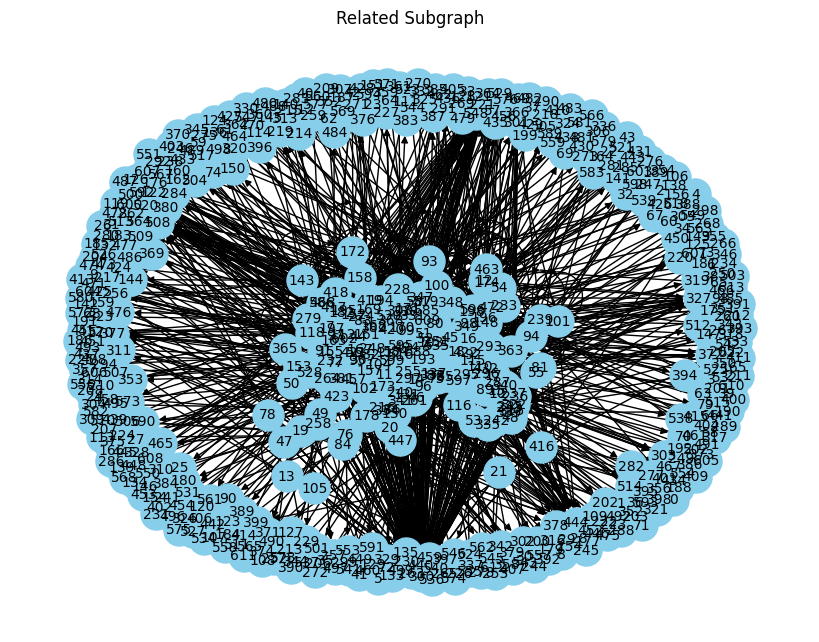

In [ ]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt

# ... (the previous code to create and convert the subgraph)

# Now you can visualize the subgraph_dgl using NetworkX and Matplotlib
#subgraph_nx = related_subgraph.to_networkx()

pos = nx.spring_layout(nx_graph)  # Layout algorithm (you can change this)

# Plot the subgraph
plt.figure(figsize=(8, 6))
nx.draw(nx_graph, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')
plt.title("Related Subgraph")
plt.show()


In [ ]:
file_path = "nx_graph.gml"
nx.write_gml(nx_graph, file_path)

In [ ]:
import networkx as nx

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6)])

# Specify the node for which you want to find neighbors
given_node = 99

# Extract all nodes related to the given node
neighbors = list(nx_graph.neighbors(given_node))

print("Nodes related to node", given_node, "are:", neighbors)


Nodes related to node 99 are: [529, 99, 1, 508, 389, 405, 300]


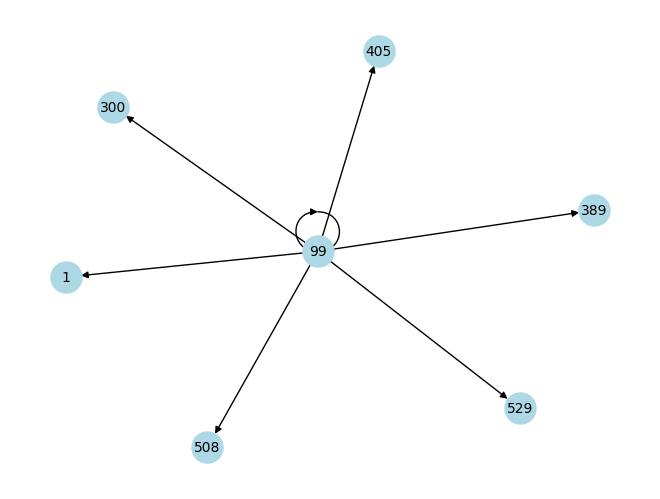

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6)])

# Specify the node for which you want to find neighbors
given_node = 99

# Extract all nodes related to the given node
neighbors = list(nx_graph.neighbors(given_node))

# Create a subgraph containing the neighbors
subgraph = nx_graph.subgraph(neighbors + [given_node])

# Display the subgraph
pos = nx.spring_layout(subgraph)  # You can use different layout algorithms
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.show()


In [ ]:
nx_graph

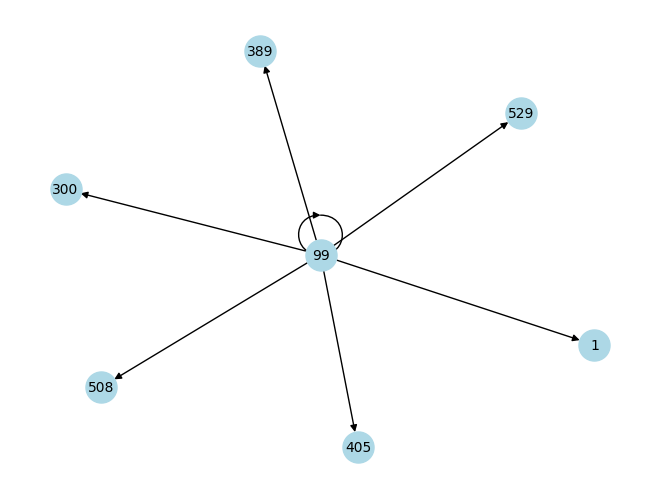

In [ ]:
show_subgraph(nx_graph,99)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def show_subgraph(graph, node_id):
    try:
        # Extract all nodes related to the given node
        neighbors = list(graph.neighbors(node_id))

        # Create a subgraph containing the neighbors
        subgraph = graph.subgraph(neighbors + [node_id])

        # Display the subgraph
        pos = nx.spring_layout(subgraph)  # You can use different layout algorithms
        nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
        plt.show()
    except nx.NetworkXError:
        print(f"Node {node_id} is not in the graph.")

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6)])

# Specify the node for which you want to find neighbors
given_node = 99  # Change this to the desired node ID

# Call the function to display the subgraph
show_subgraph(G, given_node)


Node 99 is not in the graph.


In [ ]:
print_predecessors_and_successors(graph, 99)

Node 99's predecessors: [99]
Node 99's successors: [529, 99, 1, 508, 389, 405, 300]


In [ ]:
import dgl
import networkx as nx

# Create a DGL graph (replace this with your own DGL graph)
g = dgl.DGLGraph()
g.add_nodes(4)
g.add_edges([0, 0, 1, 2], [1, 2, 3, 3])

# Convert DGL graph to NetworkX graph
nx_graph = g.to_networkx()

def get_related_subgraph(graph, node_id):
    # Use NetworkX to extract a subgraph
    subgraph_nodes = nx.ego_graph(graph, node_id, radius=1)  # Adjust the radius as needed

    # Convert the subgraph back to a DGL graph
    subgraph = dgl.DGLGraph()
    subgraph.add_nodes(len(subgraph_nodes))
    subgraph_edges = list(subgraph_nodes.edges())
    subgraph.add_edges(*zip(*subgraph_edges))

    return subgraph

# Usage example
node_id = 0  # Replace with the node ID you want to use
related_subgraph = get_related_subgraph(nx_graph, node_id)


# Now you can work with the related subgraph_dgl using DGL functions


In [ ]:
related_subgraph

Graph(num_nodes=1, num_edges=0,
      ndata_schemes={}
      edata_schemes={})

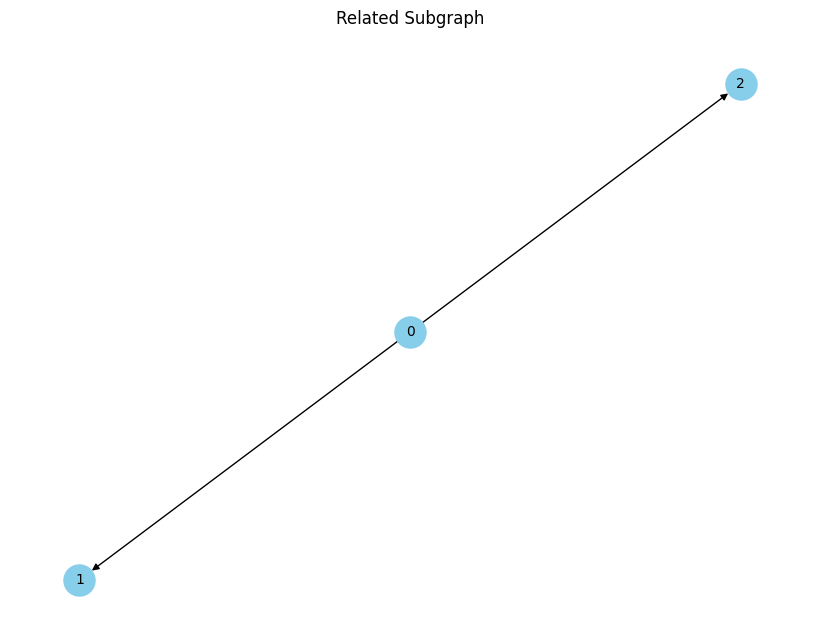

In [ ]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt

# ... (the previous code to create and convert the subgraph)

# Now you can visualize the subgraph_dgl using NetworkX and Matplotlib
subgraph_nx = related_subgraph.to_networkx()
pos = nx.spring_layout(subgraph_nx)  # Layout algorithm (you can change this)

# Plot the subgraph
plt.figure(figsize=(8, 6))
nx.draw(subgraph_nx, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')
plt.title("Related Subgraph")
plt.show()


In [ ]:
related_subgraph

Graph(num_nodes=3, num_edges=2,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
import dgl

# Create a DGL graph (replace this with your own DGL graph)
g = dgl.DGLGraph()
g.add_nodes(4)
g.add_edges([0, 0, 1, 2], [1, 2, 3, 3])

# Function to print predecessors and successors
def print_predecessors_and_successors(graph, node):
    # Get the predecessors (incoming neighbors) of the node
    predecessors = graph.predecessors(node)

    # Get the successors (outgoing neighbors) of the node
    successors = graph.successors(node)

    print(f"Node {node}'s predecessors:", predecessors.tolist())
    print(f"Node {node}'s successors:", successors.tolist())

# Usage example
node = 0  # Replace with the node you want to query
print_predecessors_and_successors(g, node)


Node 0's predecessors: []
Node 0's successors: [1, 2]
